In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    # 水増しの手法を配列にまとめる
    methods = [flip, thr, filt, resize, erode]
        
    # flip は画像の左右反転
    # thr  は閾値処理
    # filt はぼかし
    # resizeはモザイク
    # erode は収縮
    #     をするorしないを指定
    # 
    # imgの型はOpenCVのcv2.read()によって読み込まれた画像データの型
    # 
    # 水増しした画像データを配列にまとめて返す
    
    # 画像のサイズを習得、収縮処理に使うフィルターの作成
    img_size = img.shape
    filter1 = np.ones((3, 3))
    # オリジナルの画像データを配列に格納
    images = [img]
    
    
    # 手法に用いる関数
    scratch = np.array([
       
        #画像の左右反転のlambda関数
        lambda x: cv2.flip(x,1),
        
        #閾値処理のlambda関数(閾値を超えるとそのまま、閾値を超えない場合は0)
        lambda x: cv2.threshold(x,100,255,cv2.THRESH_TOZERO)[1],
        
        #ぼかしのlambda関数(ガウスフィルター)
        lambda x: cv2.GaussianBlur(x,(5,5),0),
        
        #モザイク処理のlambda関数
        lambda x: cv2.resize(cv2.resize(x,(x.shape[1] // 5, x.shape[0] // 5)),(x.shape[1], x.shape[0])),
        
        #収縮するlambda関数(フィルター領域内に0があれば、領域全体を0にする)
        lambda x: cv2.erode(x,filter1)
        
    ])
    
    # 関数と画像を引数に、加工した画像を元と合わせて水増しする関数
    doubling_images = lambda f, imag: (imag + [f(i) for i in imag])
    
    # doubling_imagesを用いてmethodsがTrueの関数で水増し
    for func in scratch[methods]:
        images = doubling_images(func,images)
    
    return images
    
# 画像の読み込み
cat_img = cv2.imread("./4050_cleansing_data/cat_sample.jpg")

# 画像の水増し
scratch_cat_images = scratch_image(cat_img)

# 画像を保存するフォルダーを作成
if not os.path.exists("scratch_images3"):
    os.mkdir("scratch_images3")

for num, im in enumerate(scratch_cat_images):
    # まず保存先のディレクトリ"scratch_images/"を指定、番号を付けて保存
    cv2.imwrite("scratch_images3/" + str(num) + ".jpg" ,im) 

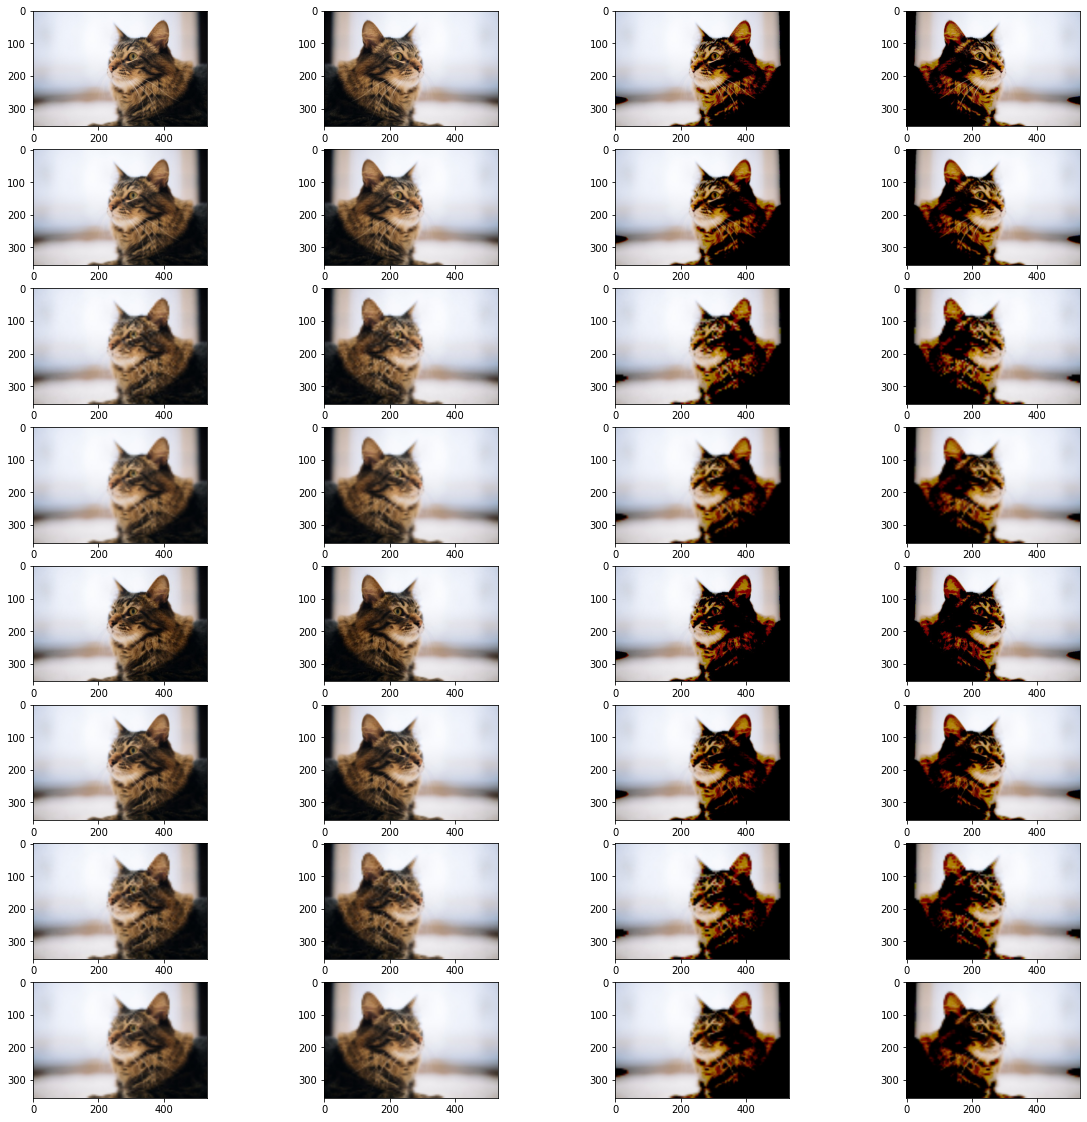

In [52]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

os.chdir("./scratch_images3")
img = Image.open("0.jpg")

fig=plt.figure(figsize=(20,20))
for i in range(32):
  img= Image.open(f"{i}.jpg")
  ax=fig.add_subplot(8,4,i+1)
  ax.imshow(img)
